## Example for utils for xrd

In [5]:
!ls *.py

cif-to-poscar.py  cif-to-xrdcsv.py  poscar-to-cif.py


## cif-to-xrdcsv.py
: generate XRD pattern as csv file. <br>
additional_INPUT.csv file includes the parameters for XRD.<br>
INST_XRD.PRM includes the parameters for GSAS-II program for XRD generation.<br>
2theta range is read from additional_INPUT.csv prior to INST_XRD.PRM.

ex) 
> python ./cif-to-xrdcsv.py [cif file] [csv file]


#### additional_INPUT.csv
- **xray_wavelength** : XRD source wavelength for pymatgen option.
- **xrd_2theta_min** : minimum value of 2theta (default : 0)
- **xrd_2theta_max** : maximum value of 2theta (default : 180)
- **d_2theta** : width of 2theta grid (default : 0.01)
- **xrd_sigma** : smearing factor (default : 0.5)
- **bool_gsas** : XRD is generated from GSAS-II (True). <br> 
  Otherwise, it is generated from pymatgen (False)

#### INST_XRD.PRM (necessary when bool_gsas is True)
- 5th row includes the information of x-ray source wavelength. This is prior to info. of additional_INPUT.csv.

In [7]:
%%bash
python ./cif-to-xrdcsv.py MgO_test.cif MgO_xrd.csv

GSAS-II binary directory: /home/e1739/GSASII/bindist
/home/e1739/util_for_xrd-230615/sim.cif read by Reader CIF
gpx file saved as /home/e1739/util_for_xrd-230615/sim.gpx
Simulating 18001 points from 0.0 to 180.0 degrees 2theta
Instrument parameters read: /home/e1739/util_for_xrd-230615/INST_XRY.PRM bank 1
gpx file saved as /home/e1739/util_for_xrd-230615/sim.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 27732 with 18001 obs.
Read from file:/home/e1739/util_for_xrd-230615/sim.bak0.gpx
Save to file  :/home/e1739/util_for_xrd-230615/sim.gpx
GPX file save successful
 Refinement results are in file: /home/e1739/util_for_xrd-230615/sim.lst
 ***** Refinement successful *****
gpx file saved as /home/e1739/util_for_xrd-230615/sim.gpx
[[0.0000e+00 1.0000e+00]
 [1.0000e-02 1.0000e+00]
 [2.0000e-02 1.0000e+00]
 ...
 [1.7998e+02 1.0000e+00]
 [1.7999e+02 1.0000e+00]
 [1.8000e+02 1.0000e+00]]


Check files list. <br>
- _xrd.csv includes 2theta, XRD intensity 
- _xrd_smeared.csv includes 2theta, smeared XRD intensity


In [8]:
!ls

INST_XRY.PRM	      cif-to-poscar.py	sim.cif
MgO_test.cif	      cif-to-xrdcsv.py	sim.gpx
MgO_xrd.csv	      cossim_vs_xrdcsv	sim.lst
MgO_xrd_smeared.csv   poscar-to-cif.py	xrd-analysis-test.ipynb
additional_INPUT.csv  sim.bak0.gpx


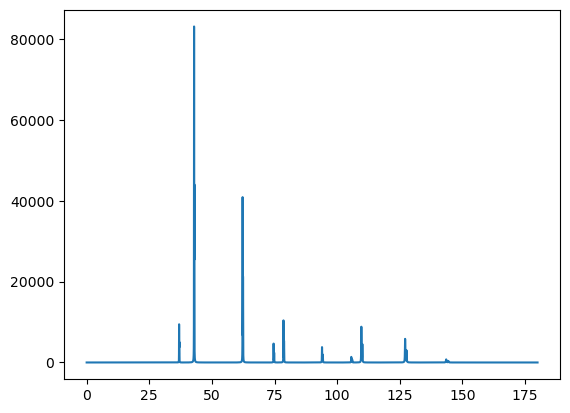

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

chi = pd.read_csv('MgO_xrd.csv',header=None)
plt.plot(chi.iloc[:,0],chi.iloc[:,1])
plt.show()

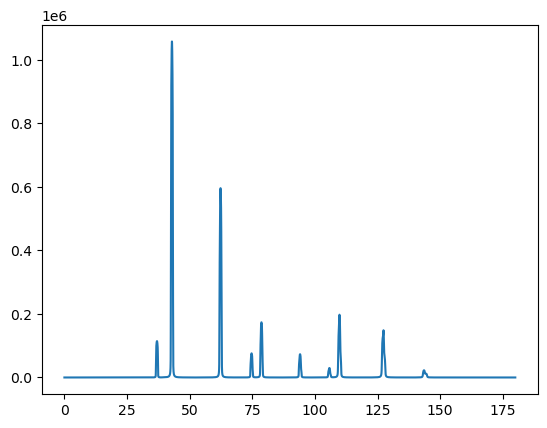

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

chi = pd.read_csv('MgO_xrd_smeared.csv',header=None)
plt.plot(chi.iloc[:,0],chi.iloc[:,1])
plt.show()

## cif-to-poscar.py 
: transform cif file to POSCAR (input structure of VASP)/CONTCAR (output structure of VASP)

ex)
> python ./cif-to-poscar.py [cif file] [POSCAR/CONTCAR file]



In [12]:
%%bash
python ./cif-to-poscar.py MgO_test.cif CONTCAR_MgO_test

## poscar-to-cif.py 
: transform POSCAR/CONTCAR to cif file

ex)

> python ./cif-to-poscar.py [POSCAR/CONTCAR file] [cif file]

In [15]:
%%bash
python ./poscar-to-cif.py CONTCAR_MgO_test MgO_transformed